In [2]:
from PIL import Image

# Specify the path to your TIFF file
file_path = "/home/dotronghiep/Documents/Research/Peanuts_Anomaly_Detection_PAD/realsense-fps-and-video/depth_20231225_204950.tiff"

# Open the TIFF file
image = Image.open(file_path)

# Display some information about the image
print("Image format:", image.format)
print("Image size:", image.size)
print("Image mode:", image.mode)


Image format: TIFF
Image size: (1280, 720)
Image mode: I;16


In [6]:
import numpy as np

# Convert the image to a numpy array
image_array = np.array(image)

# Print the pixel values in a 2D matrix shape
print(image_array)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
print(min(image_array.flatten()))

0


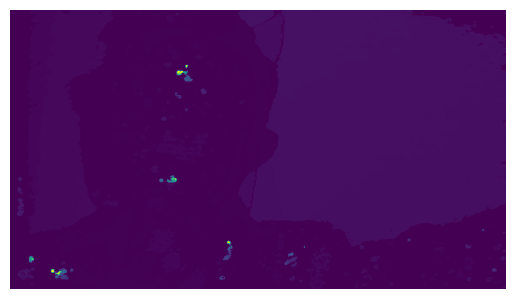

In [3]:
import matplotlib.pyplot as plt

# Display the TIFF image
plt.imshow(image)
plt.axis('off')
plt.show()


In [3]:
import pyrealsense2 as rs
import numpy as np
import cv2

pipe = rs.pipeline()
cfg  = rs.config()

cfg.enable_stream(rs.stream.color, 640,480, rs.format.bgr8, 30)
cfg.enable_stream(rs.stream.depth, 640,480, rs.format.z16, 30)

pipe.start(cfg)

while True:
    frame = pipe.wait_for_frames()
    depth_frame = frame.get_depth_frame()
    color_frame = frame.get_color_frame()

    depth_image = np.asanyarray(depth_frame.get_data())
    color_image = np.asanyarray(color_frame.get_data())
    depth_cm = cv2.applyColorMap(cv2.convertScaleAbs(depth_image,
                                     alpha = 0.5), cv2.COLORMAP_JET)

    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    cv2.imshow('rgb', color_image)
    cv2.imshow('depth', depth_cm)

    if cv2.waitKey(1) == ord('q'):
        break

pipe.stop()

RuntimeError: Couldn't resolve requests